# EDA (Exploratory Data Analisys)

## 0. Libarary 불러오기 및 경로설정

In [137]:
# !apt-get install libgl1-mesa-glx
# !pip uninstall -y opencv-contrib-python
# !pip uninstall -y opencv-python
# !pip install opencv-contrib-python
# !pip install opencv-python
# !pip install seaborn

import os
import cv2
import pandas as pd
from PIL import Image
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
!pwd


/opt/ml/code


In [139]:
train_dir = '/opt/ml/input/data/train'
train_img_dir = os.path.join(train_dir, 'images')
train_img_sub_dirs = [os.path.join(train_img_dir, sub_dir) for sub_dir in os.listdir(train_img_dir) if os.path.isdir(os.path.join(train_img_dir, sub_dir))]

## 1. Input 분석

### 1-0. X load

In [39]:
train_img_paths = [[os.path.join(sub_dir, img) for img in os.listdir(sub_dir) if not img.startswith('.')]  for sub_dir in train_img_sub_dirs]
print(train_img_paths[0])

['/opt/ml/input/data/train/images/003790_male_Asian_46/mask1.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/mask3.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/incorrect_mask.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/mask2.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/mask5.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/mask4.jpg', '/opt/ml/input/data/train/images/003790_male_Asian_46/normal.jpg']


### 1-1. X의 feature

In [81]:
a, b = (np.random.choice(len(train_img_paths)-1, 1)[0], np.random.choice(7, 1)[0])

X_ = cv2.imread(train_img_paths[a][b])
print(f'X_.shape : {X_.shape}')

X = torch.tensor(X_).permute(1, 0, 2)
print(f'X.shape : {X.shape}')

print(f'X의 채널수 : {X.shape[2]}')
print(f'X의 크기 : {X.shape[0]} x {X.shape[1]}')

X_.shape : (512, 384, 3)
X.shape : torch.Size([384, 512, 3])
X의 채널수 : 3
X의 크기 : 384 x 512


### 1-2. X의 사이즈

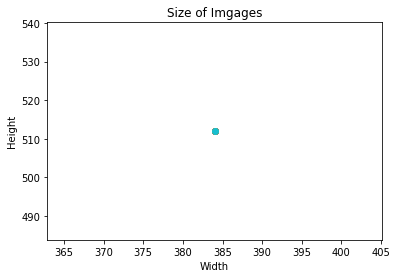

In [90]:
for _ in range(1000):
    a, b = (np.random.choice(len(train_img_paths)-1, 1)[0], np.random.choice(7, 1)[0])

    X_ = cv2.imread(train_img_paths[a][b])


    X = torch.tensor(X_).permute(1, 0, 2)
    plt.scatter(X.shape[0], X.shape[1])

plt.title('Size of Imgages')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

### 1-3. 분석 대상이 되는 객체의 위치

In [94]:
#TODO

### 1-4. RGB 채널별 통계 값

In [95]:
#TODO

## 2. Output 분석train_img_path

### 2-1.target이 될 y에 대한 분석


In [150]:
train_info = pd.read_csv(os.path.join(train_dir, 'train.csv'))
print(train_info)

          id  gender   race  age                    path
0     000001  female  Asian   45  000001_female_Asian_45
1     000002  female  Asian   52  000002_female_Asian_52
2     000004    male  Asian   54    000004_male_Asian_54
3     000005  female  Asian   58  000005_female_Asian_58
4     000006  female  Asian   59  000006_female_Asian_59
...      ...     ...    ...  ...                     ...
2695  006954    male  Asian   19    006954_male_Asian_19
2696  006955    male  Asian   19    006955_male_Asian_19
2697  006956    male  Asian   19    006956_male_Asian_19
2698  006957    male  Asian   20    006957_male_Asian_20
2699  006959    male  Asian   19    006959_male_Asian_19

[2700 rows x 5 columns]


In [173]:
ratio_age = train_info['age'].groupby(pd.cut(train_info['age'], np.arange(0, 120, 30))).count()
print(ratio_age)

age
(0, 30]     1298
(30, 60]    1402
(60, 90]       0
Name: age, dtype: int64


In [170]:
np.arange(0, 120, 30)

array([ 0, 30, 60, 90])

In [146]:
# 클래스 요소인 gender 분포
ratio_gender = train_info[['gender', 'path']].groupby(['gender']).count().to_dict()['path']

def age_process(x: int) -> int:
    if x<30:
        return 0
    elif 30<=x<60:
        return 1
    else:
        return 2
    
ratio_age = train_info[['age']].apply(age_process)


ratio_age = train_info[['age', 'path']].groupby(['age']).count().to_dict()['path']


fig, axs = plt.subplots(2,2)

axs[0, 0].pie(ratio_gender.values(), labels=ratio_gender.keys(), autopct='%1.1f%%')
axs[0, 1].pie(ratio_age.values(), labels=ratio_age.keys(), autopct='%1.1f%%')

plt.show()





ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 3. 관계 분석

In [113]:
train_dir = '../data/train/train'
train_image_dir = os.path.join(train_dir, 'images')

data_per_person = os.listdir(train_image_dir)
train_info_path = os.path.join(train_dir, 'train.csv')
train_info = pd.read_csv(train_info_path) 
print(train_info)

FileNotFoundError: [Errno 2] No such file or directory: '../data/train/train/images'

In [210]:
qr = train_info[train_info.path == '000001_female_Asian_45']
print(qr)

print(qr[['gender', 'age']])
a  = qr[['gender', 'age']]
print(a)
print()
[x, y] = a.values[0]
print(x, y)


       id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
   gender  age
0  female   45
   gender  age
0  female   45

female 45


In [163]:
# train.csv의 path 정보와 실제 이미지 정보 일치 여부 확인

from collections import Counter

c_from_dir = Counter(data_per_person)
print(len(c_from_dir))

c_from_csv = Counter(train_info['path'].unique())
print(len(c_from_csv))

print(c_from_csv == c_from_dir)

print(any(filter(lambda a: a != 1, c_from_csv.values())))

train_image_sub_dirs = [os.path.join(train_image_dir, sub_dir) for sub_dir in train_info['path'].unique()]



2700
2700
True
False


In [86]:
# 사람별 사진 파일 이름과 확장자 확인

c_pic_names = Counter()
c_pic_ext = Counter()
train_image_paths = []

def updateCount(fileName):
    name, ext = tuple(fileName.split('.'))
    
    c_pic_names.update([name])
    c_pic_ext.update([ext])


for i in range(len(train_image_sub_dirs)):
    sub_dirs = os.listdir(train_image_sub_dirs[i])
    
    for sub_dir in sub_dirs:
        train_image_paths.append(os.path.join(train_image_sub_dirs[i], sub_dir))
        updateCount(sub_dir)
    
print(f'파일 이름 : \n{c_pic_names}')
print(f'확장자 : \n{c_pic_ext}')



파일 이름 : 
Counter({'incorrect_mask': 2700, 'mask4': 2700, 'mask5': 2700, 'mask1': 2700, 'normal': 2700, 'mask2': 2700, 'mask3': 2700})
확장자 : 
Counter({'jpg': 18035, 'png': 511, 'jpeg': 354})


In [105]:
# input (X) 분석
t_train_images = []
c_dims = Counter()

for train_image_path in train_image_paths:
    image = Image.open(train_image_path)
    t_image = transforms.ToTensor()(image)
    t_train_images.append(t_image)
    c_dims.update([t_image.shape])
    
print(c_dims)




Counter({torch.Size([3, 512, 384]): 18900})


In [220]:
transform = transforms.Compose([
    Resize((512, 384), Image.BILINEAR),
    ToTensor(),
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2)),
])

train_dataset = TrainDataset(train_info_path, train_image_paths, transform)
X, y = next(iter(train_dataset))

print(X.shape)
print(X)
print(y)




incorrect_mask
torch.Size([3, 512, 384])
tensor([[[ 1.2451,  1.2451,  1.2451,  ...,  1.4412,  1.4412,  1.4412],
         [ 1.2451,  1.2451,  1.2451,  ...,  1.4412,  1.4412,  1.4412],
         [ 1.2451,  1.2451,  1.2451,  ...,  1.4412,  1.4412,  1.4412],
         ...,
         [ 0.4216,  0.4412,  0.4412,  ...,  0.4608,  0.4608,  0.4608],
         [ 0.3627,  0.3627,  0.3627,  ...,  0.4804,  0.4804,  0.4804],
         [ 0.3039,  0.3039,  0.3039,  ...,  0.5392,  0.5392,  0.5392]],

        [[ 1.2255,  1.2255,  1.2255,  ...,  1.4216,  1.4216,  1.4216],
         [ 1.2255,  1.2255,  1.2255,  ...,  1.4216,  1.4216,  1.4216],
         [ 1.2255,  1.2255,  1.2255,  ...,  1.4216,  1.4216,  1.4216],
         ...,
         [-0.5980, -0.5784, -0.5784,  ..., -0.6569, -0.6569, -0.6569],
         [-0.6569, -0.6569, -0.6569,  ..., -0.6373, -0.6373, -0.6373],
         [-0.7157, -0.7157, -0.7157,  ..., -0.6569, -0.6569, -0.6569]],

        [[ 1.1275,  1.1275,  1.1275,  ...,  1.3235,  1.3235,  1.3235],
    

/Users/hhgroot/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [ ]:
class Classifier():
    def __init__(self, gender: str, age: int, classValue: str ):
        self.mask = self._toMask(classValue)
        self.gender = gender
        self.age = self._toAge(age)

    def _toMask(self, classValue) -> str:
        if classValue == 'incorrect_mask':
            return 'Incorrect'
        elif classValue == 'normal':
            return 'Not Wear'
        else :
            return 'Wear'
    
    def _toAge(self, age: int):
        if age < 30:
            return 0
        elif age >= 60:
            return 2
        else:
            return 1

    def get_class(self):
        y = 0
        if self.mask == 'Incorrect':
            y += 6
        elif self.mask == 'Not Wear':
            y += 12
        
        if self.gender == 'female':
            y += 3
        
        y += self.age

        return y


class TrainDataset(Dataset):
    def __init__(self, info_path: str, img_paths: str, transform: transforms.Compose):
        self.info = pd.read_csv(os.path.join(info_path))
        self.img_paths = img_paths
        self.transform = transform
        self.classes = [i for i in range(18)]

    def __getitem__(self, index):
        image_path = self.img_paths[index]
        image = Image.open(image_path)
        
        dirName, fileName = os.path.split(image_path)
        _, person = os.path.split(dirName)
        classValue, ext = fileName.split('.')
        
        print(classValue)
        if self.transform:
            image = self.transform(image)
        return image, self._toY(person, classValue)

    def __len__(self):
        return len(self.img_paths)
    
    def _toY(self, person, classValue) -> torch.Tensor:
        qr = self.info[self.info.path == person]
        gender, age = qr[['gender', 'age']].values[0]
        classifier = Classifier(gender=gender, age=age, classValue=classValue)
        print(classifier)
        return classifier.get_class()